# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

- Trees are constructed by recursively splitting the dataset into subsets based on the feature that results in the greatest improvement in the model’s performance.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

- Trees can naturally handle non-linear relationships because they do not assume any specific functional form. They divide the feature space into regions using threshold-based splits. In contrast, linear models assume a straight-line relationship between features and the target, which limits their flexibility for capturing complex patterns.

3. Why is the Gini a good loss function for categorical target variables? 

- The Gini index measures how mixed the classes are of a node. It’s easy to compute and promotes “pure” splits where one class dominates. This helps create nodes that are more certain in their predictions.

4. Why do trees tend to overfit, and how can this tendency be constrained? 

- Trees overfit because they can grow deep and memorize the training data, especially when allowed unlimited splits. This makes them too specific. To constrain this, we can limit the tree’s depth, set a minimum number of samples per leaf, or use pruning to cut back branches that don’t generalize well.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

- False. While trees handle categorical variables well, they can also perform effectively with numeric features. In fact, they are versatile because they split features at thresholds, regardless of type. However, they may be especially advantageous when there are many levels of categorical variables, which are harder for linear models to handle directly.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

- Most implementations use binary splits because they’re computationally simpler and easier to interpret. Allowing multiple branches at once would increase complexity and make the tree harder to prune.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

- Some overfitting signsare that the tree is very deep, has many leaves with few samples, or near-perfect accuracy on training but poor on testing. Some underfitting signs are that the tree is very shallow, has low accuracy on both training and testing, or fails to capture obvious trends. Some heuristics ways are to compare training vs. test performance, examine tree depth and size, and use visualizations to assess fit quality.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [58]:
#q1
import pandas as pd

file_path = '/Users/rameezrauf/Desktop/ds_3021/trees/assignment/data/cars_hw.csv'
df = pd.read_csv(file_path)

print(df.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


In [59]:
#q2
from sklearn.model_selection import train_test_split

df.columns = df.columns.str.strip()

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 
                    'Fuel_Type', 'Transmission', 'Transmission_Type']
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (780, 46)
Testing Features Shape: (196, 46)


In [60]:
#q3
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

r2_scores = []
leaf_range = range(1, 26)

for leaf in leaf_range:
    tree = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)
    
best_leaf = leaf_range[r2_scores.index(max(r2_scores))]
print(f"Best min_samples_leaf: {best_leaf} with R² = {max(r2_scores):.4f}")

Best min_samples_leaf: 8 with R² = 0.8213


R² on test set: 0.8213
RMSE on test set: 143159.09


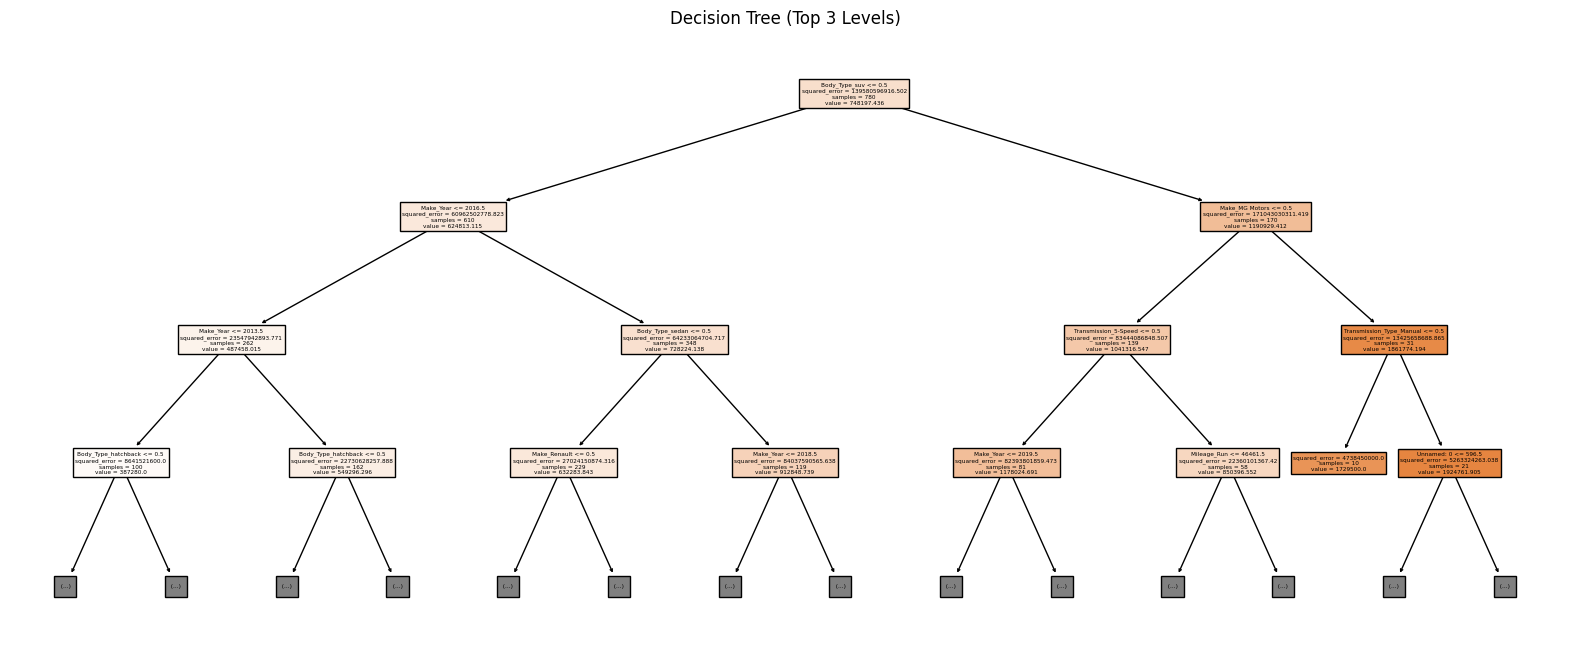

In [61]:
#q4
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

tree = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.2f}")

plt.figure(figsize=(20, 8))
plot_tree(tree, feature_names=X_train.columns, max_depth=3, filled=True)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

In [62]:
#q5
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R² on test set: {r2_lr:.4f}")
print(f"Linear Regression RMSE on test set: {rmse_lr:.2f}")

Linear Regression R² on test set: 0.8164
Linear Regression RMSE on test set: 145117.59


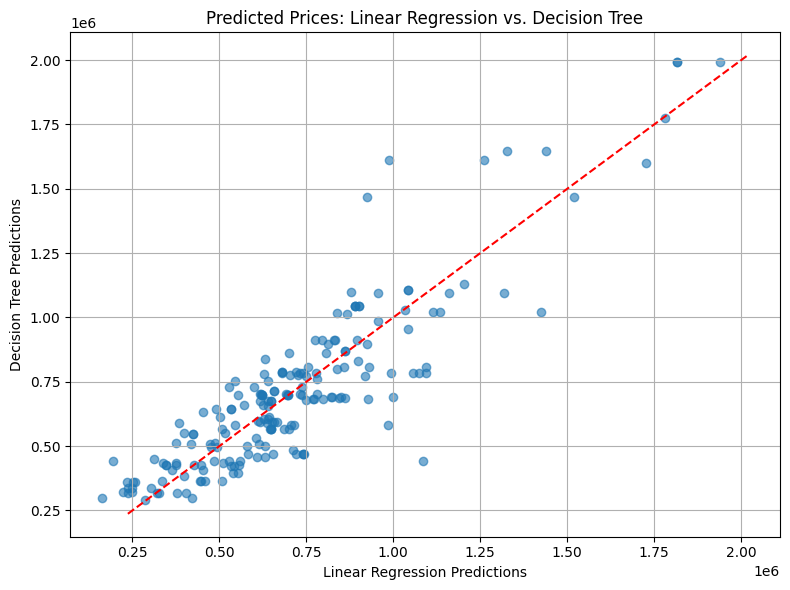

In [63]:
#q6

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dtree = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
dtree.fit(X_train, y_train)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

tree_preds = dtree.predict(X_test)
linreg_preds = linreg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(linreg_preds, tree_preds, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') 
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Predicted Prices: Linear Regression vs. Decision Tree")
plt.grid(True)
plt.tight_layout()
plt.show()

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [64]:
#q1
import pandas as pd

ratings_data = pd.read_csv("/Users/rameezrauf/Desktop/ds_3021/trees/assignment/data/corporate_ratings.csv")

print(ratings_data.head())

  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ...          

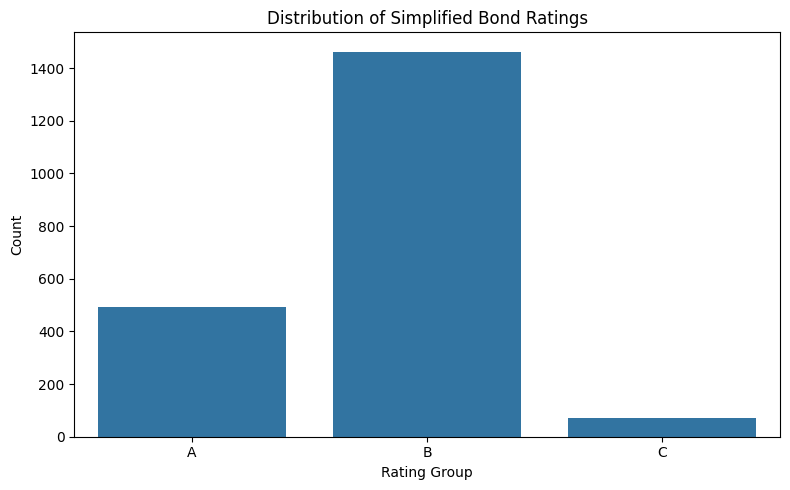

In [65]:
# q2
def simplify_rating(rating):
    if rating in ['AAA', 'AA', 'A']:
        return 'A'
    elif rating in ['BBB', 'BB', 'B']:
        return 'B'
    else:
        return 'C'

ratings_data['Simplified_Rating'] = ratings_data['Rating'].apply(simplify_rating)

plt.figure(figsize=(8, 5))
sns.countplot(data=ratings_data, x='Simplified_Rating', order=['A', 'B', 'C'])
plt.title("Distribution of Simplified Bond Ratings")
plt.xlabel("Rating Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [66]:
#q3
from sklearn.model_selection import train_test_split

drop_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
ratings_data_cleaned = ratings_data.drop(columns=drop_cols)

ratings_data_encoded = pd.get_dummies(ratings_data_cleaned, columns=['Sector'], drop_first=True)

X = ratings_data_encoded.drop(columns=['Simplified_Rating'])
y = ratings_data_encoded['Simplified_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (1623, 36)
Shape of X_test: (406, 36)


Test Accuracy: 0.6847


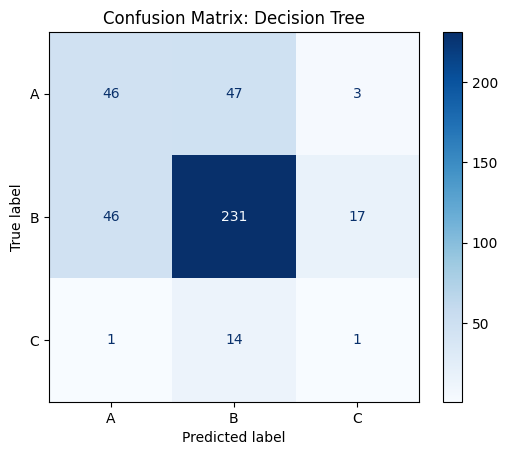

In [67]:
# q4
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Decision Tree")
plt.show()

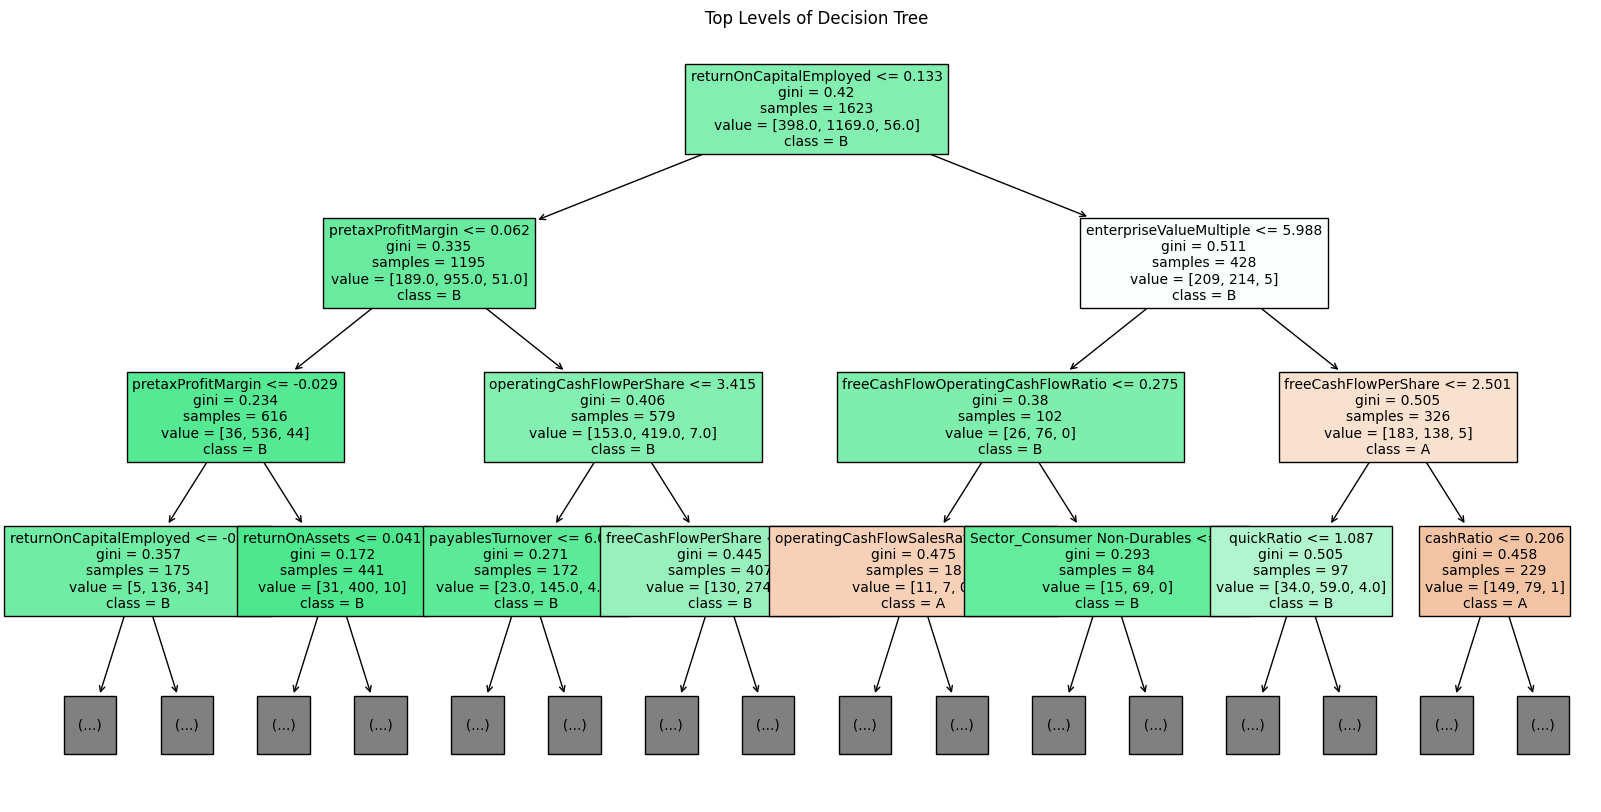

Top 10 Most Important Features:
returnOnCapitalEmployed               0.116168
operatingCashFlowPerShare             0.065393
enterpriseValueMultiple               0.065041
freeCashFlowOperatingCashFlowRatio    0.064235
pretaxProfitMargin                    0.061802
effectiveTaxRate                      0.059674
freeCashFlowPerShare                  0.055017
cashRatio                             0.048995
payablesTurnover                      0.046201
fixedAssetTurnover                    0.044400
dtype: float64


In [68]:
#q5
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['A', 'B', 'C'], 
          filled=True, max_depth=3, fontsize=10)
plt.title("Top Levels of Decision Tree")
plt.show()

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

print("Top 10 Most Important Features:")
print(top_features)

In [69]:
# q6
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_params = {}
results = []

for depth in range(2, 11):
    for leaf in range(1, 6):
        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results.append({'max_depth': depth, 'min_samples_leaf': leaf, 'accuracy': acc})

        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {'max_depth': depth, 'min_samples_leaf': leaf}

print(f"Best Accuracy: {best_accuracy:.4f} with parameters: {best_params}")

Best Accuracy: 0.7635 with parameters: {'max_depth': 3, 'min_samples_leaf': 1}


**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?